# 아파트카 데이터셋 preprocessing & EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 column들과 구성형태 확인

In [2]:
data = pd.read_csv('Auction_master_train.csv')
print(data.columns)
data.head()

Index(['Auction_key', 'Auction_class', 'Bid_class', 'Claim_price',
       'Appraisal_company', 'Appraisal_date', 'Auction_count',
       'Auction_miscarriage_count', 'Total_land_gross_area',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'First_auction_date',
       'Final_auction_date', 'Final_result', 'Creditor', 'addr_do', 'addr_si',
       'addr_dong', 'addr_li', 'addr_san', 'addr_bunji1', 'addr_bunji2',
       'addr_etc', 'Apartment_usage', 'Preserve_regist_date', 'Total_floor',
       'Current_floor', 'Specific', 'Share_auction_YorN', 'road_name',
       'road_bunji1', 'road_bunji2', 'Close_date', 'Close_result', 'point.y',
       'point.x', 'Hammer_price'],
      dtype='object')


,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,...,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,...,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,...,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,...,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,...,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


# 1. 결측치 확인 및 결측치 처리

In [3]:
print(len(data))
data.isnull().sum()
# null값 있는 컬럼들
# addr_li 리 주소
# addr_bunji2 2번째 번지
# Specific 특이사항
# road_bunji1 길주소 번지
# road_bunji2 길주소 번지2

1933


Auction_key                       0
Auction_class                     0
Bid_class                         0
Claim_price                       0
Appraisal_company                 0
Appraisal_date                    0
Auction_count                     0
Auction_miscarriage_count         0
Total_land_gross_area             0
Total_land_real_area              0
Total_land_auction_area           0
Total_building_area               0
Total_building_auction_area       0
Total_appraisal_price             0
Minimum_sales_price               0
First_auction_date                0
Final_auction_date                0
Final_result                      0
Creditor                          0
addr_do                           0
addr_si                           0
addr_dong                         0
addr_li                        1910
addr_san                          0
addr_bunji1                       4
addr_bunji2                    1044
addr_etc                          0
Apartment_usage             

### road_bunji1이 있으면 road_bunju2로 그대로 옮기고
### road_bunji1이 없으면 두 컬럼다 0으로 절대 나오지 않을 값으로 채운다.
### 있는값은 최대한 활용하고 나머지 값은 안쓰기 위함이다.

In [4]:
data['road_bunji1'].fillna(0, inplace=True)
data[data.road_bunji1 == 0]['road_bunji1'] # 확인

29      0.0
84      0.0
122     0.0
224     0.0
239     0.0
311     0.0
370     0.0
464     0.0
491     0.0
496     0.0
560     0.0
564     0.0
613     0.0
637     0.0
656     0.0
658     0.0
830     0.0
1016    0.0
1212    0.0
1346    0.0
1595    0.0
1596    0.0
1632    0.0
1832    0.0
Name: road_bunji1, dtype: float64

In [5]:
data['road_bunji2'].fillna(data['road_bunji1'], inplace=True)
data[data.road_bunji1 == 0][['road_bunji1', 'road_bunji2']] # 확인

,road_bunji1,road_bunji2
29,0.0,0.0
84,0.0,0.0
122,0.0,0.0
224,0.0,0.0
239,0.0,0.0
311,0.0,0.0
370,0.0,0.0
464,0.0,0.0
491,0.0,0.0
496,0.0,0.0


# 2. 범주형 column 7개 찾기
### Nominal 명목형과 ordinal 순서형

In [6]:
data[data.Close_result != "배당"]
# data['Close_result']

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
962,14,임의,일반,1138371040,리파인감정,2014-04-14 00:00:00,2,1,15487.3,78.55,...,NaN,N,개포로109길,69.0,69.0,1111-11-11 00:00:00,,37.496297,127.076623,1207210000
1016,1,강제,개별,900000000,신명감정,2016-03-15 00:00:00,5,4,510.0,35.11,...,NaN,Y,0,0.0,0.0,1111-11-11 00:00:00,,37.508474,126.952834,172000000
1026,843,강제,일반,117409245,도시감정,2016-06-10 00:00:00,1,0,30235.4,47.17,...,NaN,N,독막로,145.0,145.0,1111-11-11 00:00:00,,37.548457,126.929413,725550000
1040,264,임의,일반,94459726,지녕감정,2016-11-04 00:00:00,1,0,259.1,20.42,...,NaN,N,선릉로137길,6.0,6.0,1111-11-11 00:00:00,,37.519267,127.039941,330000100
1146,1215,임의,일반,80000000,현산감정,2017-02-09 00:00:00,2,1,1145.0,56.86,...,NaN,N,부일로1길,136.0,9.0,1111-11-11 00:00:00,,37.495211,126.815756,265970000
1407,1738,임의,일반,70000000,화신감정,2017-09-25 00:00:00,2,1,82595.1,57.37,...,NaN,N,신내로21길,16.0,16.0,1111-11-11 00:00:00,,37.616051,127.088214,538897000
1438,627,임의,일반,138000000,온누리감정,2017-06-21 00:00:00,2,1,1391.5,52.23,...,NaN,N,양재대로95길,60.0,60.0,1111-11-11 00:00:00,,37.531094,127.133775,445000000
1627,1202,강제,일반,238616280,성민감정,2016-11-17 00:00:00,2,1,893.0,47.22,...,NaN,N,목동동로12길,38.0,38.0,1111-11-11 00:00:00,,37.522362,126.875448,556280000
1640,1683,강제,일반,64100475,기린감정,2017-04-28 00:00:00,2,1,25472.5,26.07,...,NaN,N,신내로,51.0,51.0,1111-11-11 00:00:00,,37.604908,127.094707,331299000
1665,1667,임의,일반,181697863,프라임감정,2017-03-28 00:00:00,2,1,531.3,44.27,...,NaN,N,용마산로114길,37.0,37.0,1111-11-11 00:00:00,,37.599278,127.103362,243100000


In [7]:
# Auction_class 경매구분 : 강제/임의
# Bid_class 입찰구분 : 일반/개별/일괄
# Appraisal_company : 감정사
# Final_result : 최종결과
# Creditor : 채권자, 경매신청인
# Apartment_usage : 건물(토지)의 대표용도
# Share_auction_YorN : 지분경매 여부
# Close_result : 종국결과, 낙찰과 배당의 차이
# 이외 층, 주소도 다 범주형 변수    

### 명목형 범주형 변수 원핫인코딩으로 변경

In [8]:
dummy_var = pd.get_dummies(data.Bid_class)
data = pd.concat([data, dummy_var], axis=1)
data.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price,개별,일괄,일반
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,...,30.0,30.0,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000,1,0,0
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,...,33.0,33.0,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999,0,0,1
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,...,88.0,88.0,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999,1,0,0
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,...,110.0,110.0,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000,0,0,1
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,...,51.0,51.0,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000,0,0,1


### 순서형 변수는 없는 것 같다.

# EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000263C2C1D0B8>,
      dtype=object)

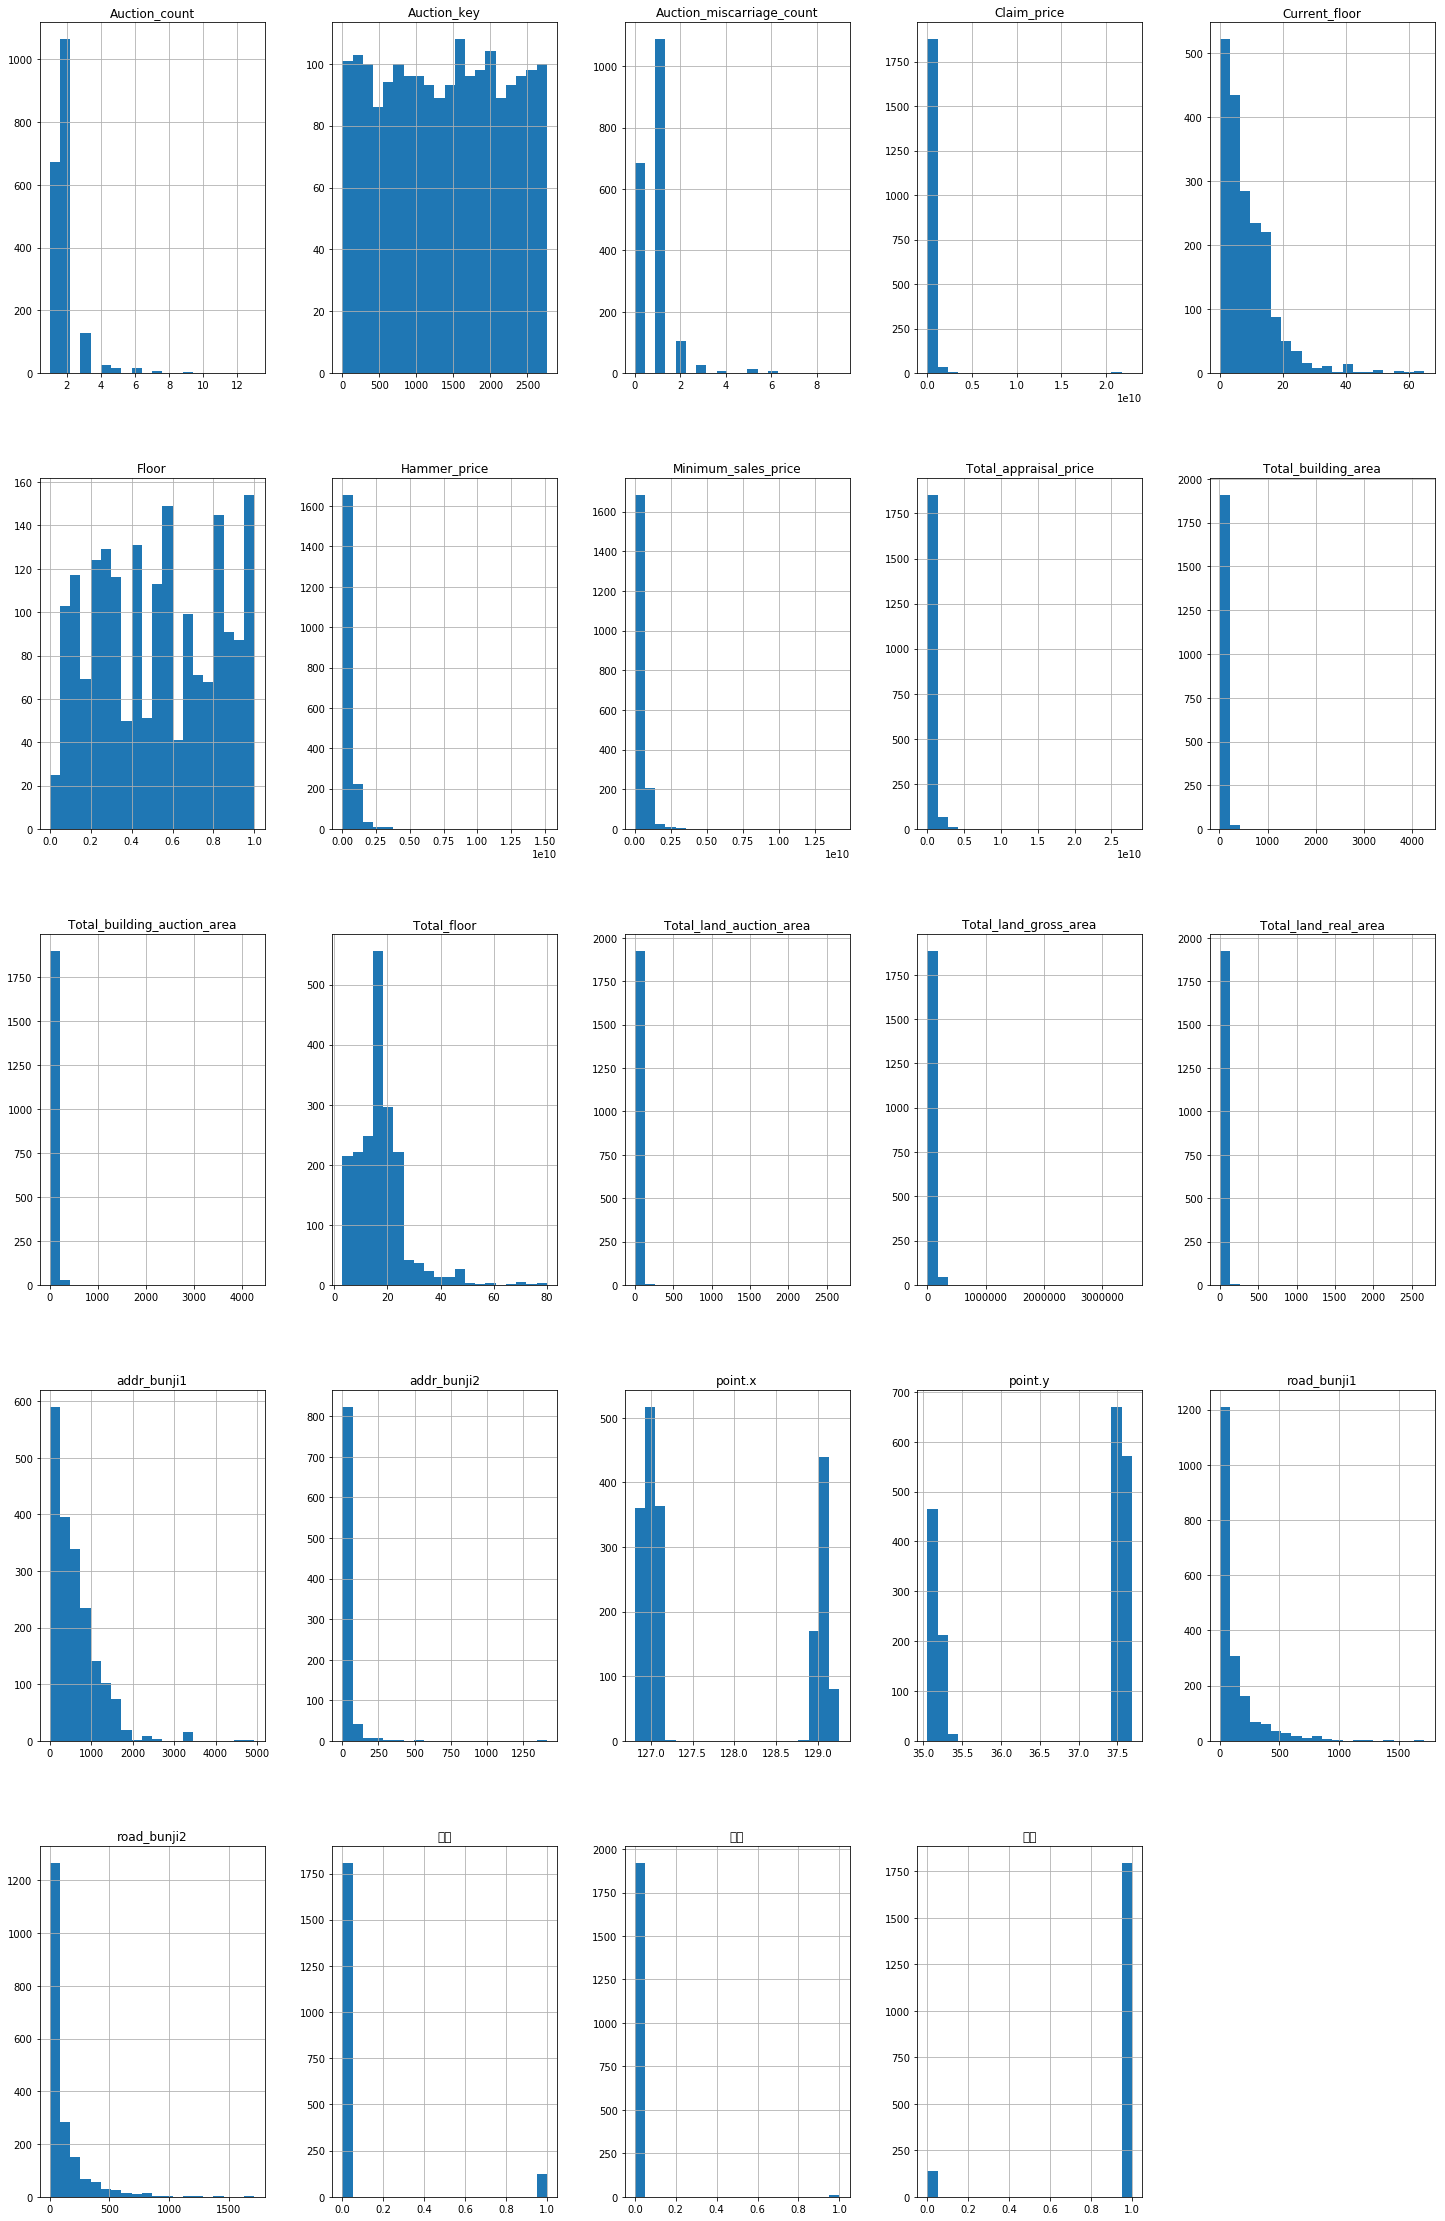

In [10]:
# 각 컬럼 분포 살펴보기
data.hist(figsize=(25, 40), bins=20)

# 3. Correlation Matrix

In [11]:
## 연속형 변수만 뽑아보기
numerical_features = ['Claim_price', 'Appraisal_date', 'Auction_count', 'Auction_miscarriage_count', 'Total_land_gross_area', 'Total_land_real_area',
      'Total_land_auction_area', 'Total_building_area', 'Total_building_auction_area', 'Total_appraisal_price', 'Minimum_sales_price',
      'First_auction_date', 'Preserve_regist_date', 'Close_date', 'point.y', 'point.x']

In [12]:
numerical_features

['Claim_price',
 'Appraisal_date',
 'Auction_count',
 'Auction_miscarriage_count',
 'Total_land_gross_area',
 'Total_land_real_area',
 'Total_land_auction_area',
 'Total_building_area',
 'Total_building_auction_area',
 'Total_appraisal_price',
 'Minimum_sales_price',
 'First_auction_date',
 'Preserve_regist_date',
 'Close_date',
 'point.y',
 'point.x']

In [13]:
data[numerical_features].corr()

,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,point.y,point.x
Claim_price,1.000000,0.013312,0.015411,0.003771,0.180421,0.182207,0.202379,0.204000,0.248846,0.261076,0.095939,-0.103605
Auction_count,0.013312,1.000000,0.972918,-0.045697,0.062824,0.062868,0.107074,0.104286,0.071038,-0.036716,-0.054074,0.051634
Auction_miscarriage_count,0.015411,0.972918,1.000000,-0.050457,0.069582,0.069392,0.118290,0.114779,0.077547,-0.033039,-0.057197,0.054032
Total_land_gross_area,0.003771,-0.045697,-0.050457,1.000000,0.049791,0.048225,0.017401,0.016474,0.041896,0.067135,0.014971,-0.014285
Total_land_real_area,0.180421,0.062824,0.069582,0.049791,1.000000,0.996224,0.940361,0.934759,0.842248,0.711515,0.060602,-0.062621
Total_land_auction_area,0.182207,0.062868,0.069392,0.048225,0.996224,1.000000,0.938144,0.941681,0.845243,0.715891,0.055776,-0.057796
Total_building_area,0.202379,0.107074,0.118290,0.017401,0.940361,0.938144,1.000000,0.993533,0.900302,0.783299,0.062797,-0.064572
Total_building_auction_area,0.204000,0.104286,0.114779,0.016474,0.934759,0.941681,0.993533,1.000000,0.901988,0.787366,0.055730,-0.057502
Total_appraisal_price,0.248846,0.071038,0.077547,0.041896,0.842248,0.845243,0.900302,0.901988,1.000000,0.960357,0.220942,-0.222110
Minimum_sales_price,0.261076,-0.036716,-0.033039,0.067135,0.711515,0.715891,0.783299,0.787366,0.960357,1.000000,0.285141,-0.285804


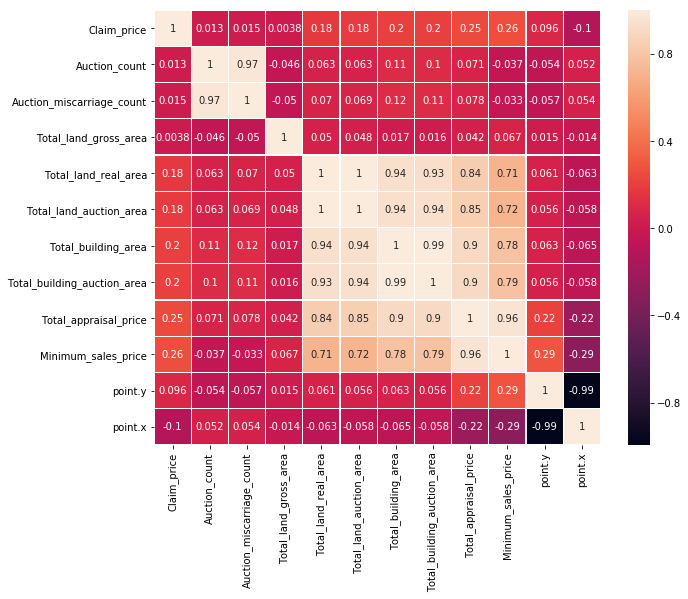

In [14]:
sns.heatmap(data[['Claim_price', 'Appraisal_date', 'Auction_count', 'Auction_miscarriage_count', 'Total_land_gross_area', 'Total_land_real_area',
      'Total_land_auction_area', 'Total_building_area', 'Total_building_auction_area', 'Total_appraisal_price', 'Minimum_sales_price',
      'First_auction_date', 'Preserve_regist_date', 'Close_date', 'point.y', 'point.x']].corr(),annot=True,linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

#### area쪽에서 양의 상곤관계가 두드러지게 나타나고 왜냐하면 건물면적과 토지면적은 큰차이가 없기때문에 비슷한 값이기 때문이다
#### point y 랑 x는 경도 y는 위도인데  37언저리 124언저리로 계속 반비례 관계를 보이기 때문이다.

# 4.연속형 변수 5가지 Hammer Price와 관계!

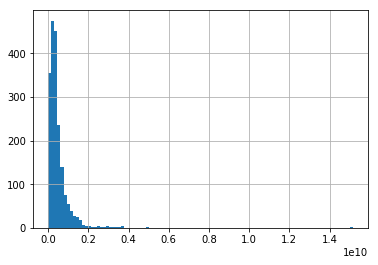

In [15]:
data['Hammer_price'].hist(bins=100, ) #hammerprice의 분포 살펴보기

### * 한글폰트설정

In [16]:
import matplotlib
import matplotlib.font_manager as fm
font_location = "c:/Windows/Fonts/NanumGothic.ttf"
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

### 정규화 먼저 - 그래프 그릴 때는 필요 없는 걸로오

In [17]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

normalized_data = min_max_scaler.fit_transform(data[['Hammer_price', 'Total_land_real_area']])
normalized_data = pd.DataFrame(normalized_data, columns=['Hammer_price', 'Total_land_real_area'])

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


실면적과 가격간의 상관게수 :  0.6960990060753118


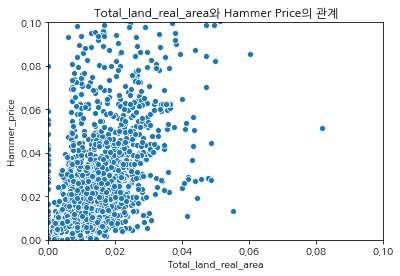

In [18]:
plot_data = normalized_data[normalized_data['Hammer_price'] < 1]
# plt.plot([0, 50000000], [0,50000000], 'r')
# plt.plot(1)
plt.xlim(0, 0.1)
plt.ylim(0, 0.1)
sns.scatterplot(x="Total_land_real_area", y="Hammer_price", data=plot_data, )
plt.title('Total_land_real_area와 Hammer Price의 관계')

print("실면적과 가격간의 상관게수 : ", data['Total_land_real_area'].corr(data['Hammer_price']))

## 강한 양의 관계를 볼 수 있다,

현재층수와 가격간의 상관게수 :  0.19801340750372382


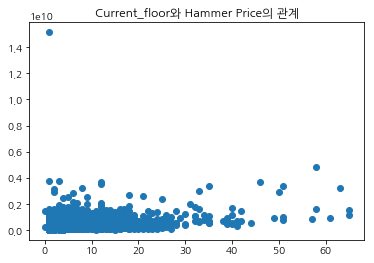

In [19]:
plt.scatter(data['Current_floor'], data['Hammer_price'])
plt.title('Current_floor와 Hammer Price의 관계')
print("현재층수와 가격간의 상관게수 : ", data['Current_floor'].corr(data['Hammer_price']))

### 관계가 없는 것을 볼 수 있다.

In [20]:
# 1111-11-11로 되어있는 날짜는 datetime으로 형변환이 불가능하여 2000년으로 임의 설정하였다.
data.loc[data['Close_date']=='1111-11-11 00:00:00','Close_date'] = '2000-01-01 00:00:00'

In [21]:
data[data['Close_date'] == '1111-11-11 00:00:00'] #확인

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price,개별,일괄,일반,Floor


In [22]:
data['Close_date'] = pd.to_datetime(data['Close_date'])

In [23]:
plot_data = data[(data['Close_date'] > '2005-01-01') & (data['Hammer_price'] < 50000000)]

clost_date와 가격간의 상관게수 :  0.19801340750372382


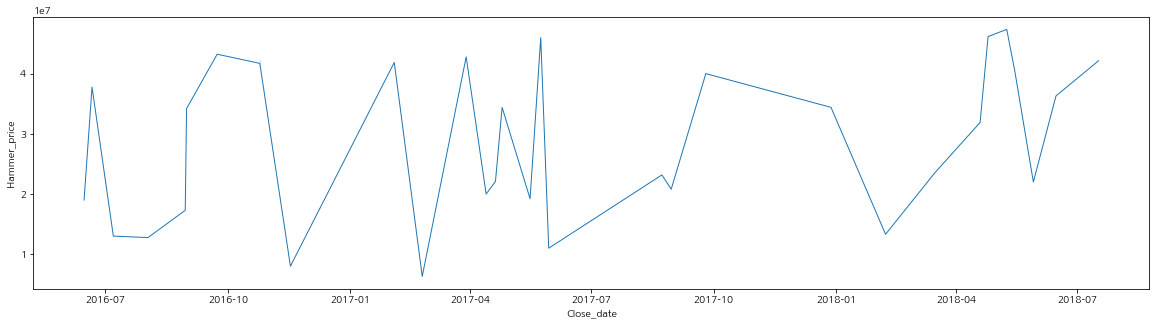

In [29]:
plt.figure(figsize=(20,5))
sns.lineplot(x=plot_data['Close_date'], y=plot_data['Hammer_price'], sort=True, lw=1)
print("clost_date와 가격간의 상관게수 : ", data['Current_floor'].corr(data['Hammer_price']))

### 시간도 관계가 없는 것 같군요

# 나머지 변수들은 상관관계계수를 bar형태로 표현해 보았다.

In [32]:
numerical_features

['Claim_price',
 'Appraisal_date',
 'Auction_count',
 'Auction_miscarriage_count',
 'Total_land_gross_area',
 'Total_land_real_area',
 'Total_land_auction_area',
 'Total_building_area',
 'Total_building_auction_area',
 'Total_appraisal_price',
 'Minimum_sales_price',
 'First_auction_date',
 'Preserve_regist_date',
 'Close_date',
 'point.y',
 'point.x']

In [39]:
label = list()
y_value = list()
for feature in numerical_features:
    try:
        print(data[feature].corr(data['Hammer_price']))
        label.append(feature)
        y_value.append(data[feature].corr(data['Hammer_price']))
    except:
        print("잘못된 데이터")

0.2677275896150054
잘못된 데이터
-0.016999014369451754
-0.011296030765491693
0.07046575907875109
0.6960990060753118
0.7006390937891094
0.768454446560645
0.7728385183227997
0.9534641207668874
0.9945917737732318
잘못된 데이터
잘못된 데이터
잘못된 데이터
0.2956976740976954
-0.29631176962478545


<BarContainer object of 12 artists>

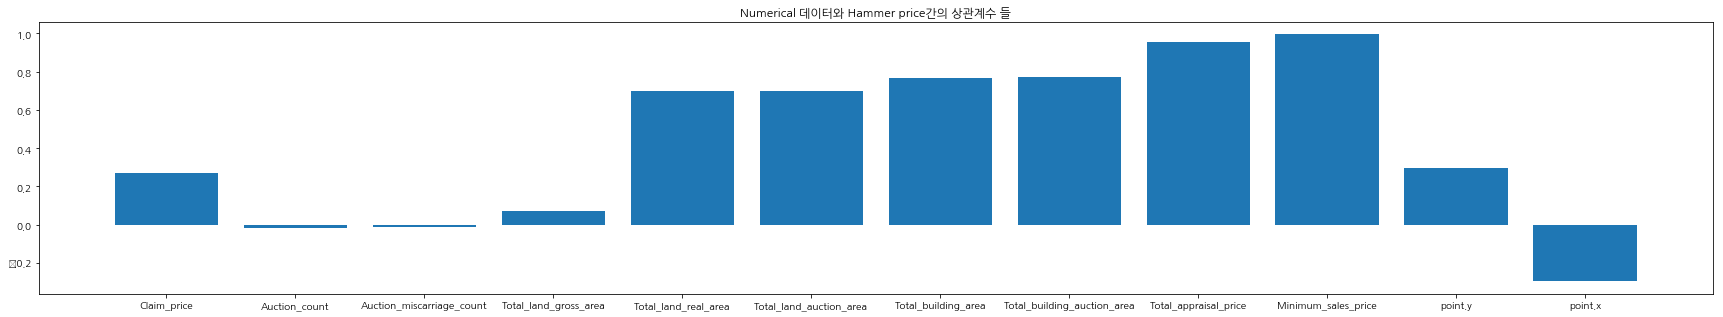

In [48]:
index = np.arange(len(label))
plt.figure(figsize=(30,5))
plt.title('Numerical 데이터와 Hammer price간의 상관계수들')
plt.bar(index, y_value, tick_label=label, align='center')

### price쪽은 hammer_price와 엄청난 양의 상관관계를 가지는 것으로 보이고 결국 낙찰가는 총감정가나 최저가격에서 큰 차이가 없는 것을 볼 수 있다.
### 상관계수가-0.5 ~ 0.5 사이의 값은 큰 의미가 없다.

# 5. 3차원 그래프 그리기

In [49]:
data.columns

Index(['Auction_key', 'Auction_class', 'Bid_class', 'Claim_price',
       'Appraisal_company', 'Appraisal_date', 'Auction_count',
       'Auction_miscarriage_count', 'Total_land_gross_area',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'First_auction_date',
       'Final_auction_date', 'Final_result', 'Creditor', 'addr_do', 'addr_si',
       'addr_dong', 'addr_li', 'addr_san', 'addr_bunji1', 'addr_bunji2',
       'addr_etc', 'Apartment_usage', 'Preserve_regist_date', 'Total_floor',
       'Current_floor', 'Specific', 'Share_auction_YorN', 'road_name',
       'road_bunji1', 'road_bunji2', 'Close_date', 'Close_result', 'point.y',
       'point.x', 'Hammer_price', '개별', '일괄', '일반', 'Floor'],
      dtype='object')

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Minimum_sales_price","Total_building_auction_area", hue="Hammer_price", data=data, split=True, ax=ax[0])
ax[0].set_title('Hammer_price vs. Minimum_sales_price && Total_building_auction_area')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Auction_count","Total_land_area", hue="Total_floor", data=data,split=True,ax=ax[1])
ax[1].set_title('Auction_count vs. Total_land_area && Total_floor')
ax[1].set_yticks(range(0,110,10))
plt.show()